## E-tivity 2
### Name: Muhammad Umer Farooq
### Student ID: 22402098

In [47]:
# Imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
# Function to fill in a value in dataframe column with most frequently occuring value in the column
def fillna(df, column_name):
    for name in column_name:
        df[name].fillna(df[name].value_counts().idxmax(), inplace=True)

## Filling in Missing Data and Creation of a New Feature

In [49]:
# Read the required CSV file
data_frame = pd.read_csv("bank.csv")

# Let's obtain shape of the data_frame
print(data_frame.shape)

#Check the missing values
print(data_frame.isna().sum())

# Lets first copy the data_frame
copied_data_frame = data_frame 

# poutcome column has more than 20% missing values, hence I am dropping it.
data_frame.drop("poutcome", axis=1, inplace=True) ;

# age column has 12 missing values, let's fill in missing age with median age 
data_frame["age"].fillna(data_frame["age"].median(), inplace=True)

#Let's fill in missing values in "job", "education", and "contract" columns with most frequent occuring values in those
#columns 
fillna(data_frame, ["job", "education", "contact"])

# Creating a new Feature, housing is a loan and there is another loan feature. 
# I am going to create another feature that will have a value "yes", if any of
# the two columns has value of "yes".
loan_mapper = {"no" : 0 , "yes" : 1}
data_frame["loan"] = data_frame["loan"].replace(loan_mapper)
data_frame["housing"] = data_frame["housing"].replace(loan_mapper)

print(data_frame["loan"])
print(data_frame["housing"])
cond_list = [(data_frame["loan"] == 1) | (data_frame["housing"] == 1) , (data_frame["housing"] == 0) & (data_frame["housing"] == 0)]
choice_list = ["yes", "no"]

data_frame["new_loan"] = np.select(cond_list, choice_list)
print(data_frame["new_loan"].values)

# Let's drop the housing and loan column as we have created a new feature out of them called "new_loan"
data_frame.drop(["housing", "loan"], axis = 1, inplace = True)

(2000, 17)
age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64
0       0
1       1
2       1
3       1
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: loan, Length: 2000, dtype: int64
0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    1
1999    0
Name: housing, Length: 2000, dtype: int64
['yes' 'yes' 'yes' ... 'no' 'yes' 'no']


## Transforming Data

In [50]:
data_frame = pd.get_dummies(data_frame, columns = ["job", "marital", "default", "new_loan", "contact"])

# Tranforming Ordinal features: education and month

#Print name of unique values in the education column
print("Unique values in education column: ", data_frame["education"].unique())

#Values in the education column are ordinal in nature, let's define a mapper for them
education_mapper = {"tertiary" : 0, "secondary" : 1, "primary" : 2}
data_frame["education"] = data_frame["education"].replace(education_mapper) ; 

#Print name of unique values in the month column
print("Unique values in month column: ", data_frame["month"].unique())

#The month column will also be treated as ordinal
month_mapper = {"jan" : 1 , "feb" : 2, "mar" : 3, "apr" : 4, "may" : 5, "jun" : 6, "jul" : 7, 
                "aug" : 8, "sep" : 9, "oct" : 10, "nov" : 11, "dec" : 12}
data_frame["month"] = data_frame["month"].replace(month_mapper)

# The subscribed column represents the output of the process. The column has value either "yes" or "no", hence we can encode 
# it as follows
print("Unique values in subscribed column: ", data_frame["subscribed"].unique())
subscribed_mapper = {"no" : 0 , "yes" : 1}
data_frame["subscribed"] = data_frame["subscribed"].replace(subscribed_mapper)

# Printing Transformed Data
print(data_frame)

Unique values in education column:  ['tertiary' 'secondary' 'primary']
Unique values in month column:  ['apr' 'dec' 'feb' 'jan' 'mar' 'may' 'nov' 'oct' 'aug' 'jul' 'jun' 'sep']
Unique values in subscribed column:  ['no' 'yes']
       age  education  balance  day  month  duration  campaign  pdays  \
0     32.0          0      392    1      4       957         2    131   
1     39.0          1      688    1      4       233         2    133   
2     59.0          1     1035    1      4       126         2    239   
3     47.0          1      398    1      4       274         1    238   
4     54.0          1     1004    1      4       479         1    307   
...    ...        ...      ...  ...    ...       ...       ...    ...   
1995  20.0          1     2785   16      9       327         2     -1   
1996  28.0          1      127   16      9      1334         2     -1   
1997  81.0          2     1154   17      9       231         1     -1   
1998  46.0          2     4343   20      9 

### Rescaling Features
Before rescaling features, let's visualize data to apply correct scaler. 

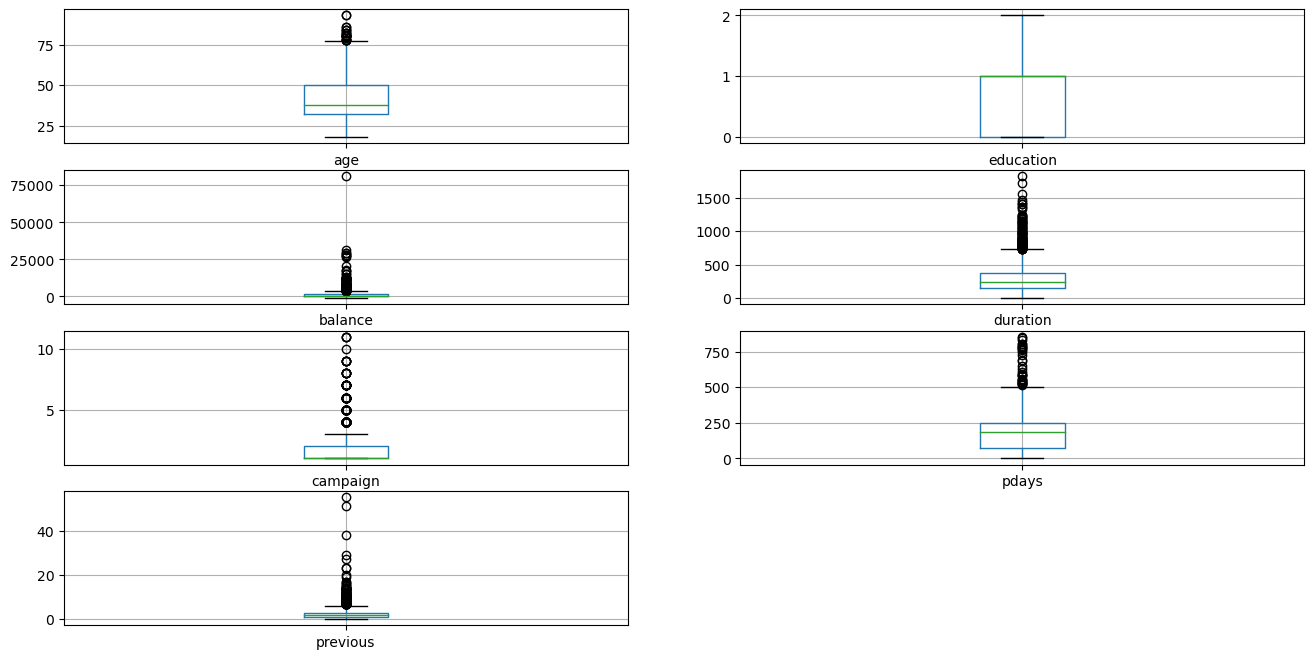

In [51]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(4,2,1)
data_frame.boxplot(column=["age"])

ax2 = fig.add_subplot(4,2,2)
data_frame.boxplot(column=["education"])

ax3 = fig.add_subplot(4,2,3)
data_frame.boxplot(column=["balance"])

ax4 = fig.add_subplot(4,2,4)
data_frame.boxplot(column=["duration"])

ax5 = fig.add_subplot(4,2,5)
data_frame.boxplot(column=["campaign"])

ax6 = fig.add_subplot(4,2,6)
data_frame.boxplot(column=["pdays"])

ax7 = fig.add_subplot(4,2,7)
data_frame.boxplot(column=["previous"])
plt.show()

It is evident from the box and whisker plots shown above that apart from feature "education", and to some extend for feature "age" all other features have considerable outliers. Hence, for features with outliers I will use RobustScaler. To decide about the scaler to be used for features "age" and "education", we should plot the distributions of these features. 

<AxesSubplot:title={'center':'Histogram for Feature Education'}>

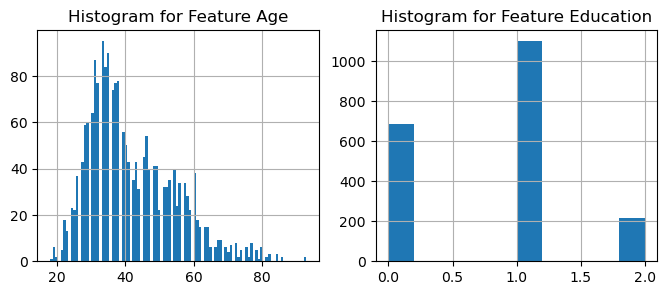

In [52]:
fig = plt.figure(figsize=(8,3))

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Histogram for Feature Age")
data_frame["age"].hist(bins=100)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Histogram for Feature Education")
data_frame["education"].hist(bins=10)

The above histograms show that the feature "age" and the feature "education" don't follow perfect Guassian distribution, hence we can use MinMaxScaler for these features as the MinMaxScaler works best for non-Guassian data. 
The following scaler will be used for the features:

MinMaxScaler - age and education

RobustScaler - balance, duration, campaign, pdays, and previous

All other features don't need to be transformed as they all are binary.

In [53]:
# Apply MinMaxScaler on feature age
scaler = MinMaxScaler()
data_frame["age"] = scaler.fit_transform(data_frame["age"].values.reshape(-1,1))

# Apply MinMaxScaler on feature education
data_frame["education"] = scaler.fit_transform(data_frame["education"].values.reshape(-1,1))

# Apply RobustTransform on balance
robust_scaler = RobustScaler() 
data_frame["balance"] = robust_scaler.fit_transform(data_frame["balance"].values.reshape(-1,1))

# Apply RobustTransform on duration
data_frame["duration"] = robust_scaler.fit_transform(data_frame["duration"].values.reshape(-1,1))

# Apply RobustTransform on campaign
data_frame["campaign"] = robust_scaler.fit_transform(data_frame["campaign"].values.reshape(-1,1))

# Apply RobustTransform on pdays
data_frame["pdays"] = robust_scaler.fit_transform(data_frame["pdays"].values.reshape(-1,1))

# Apply RobustTransform on previous
data_frame["previous"] = robust_scaler.fit_transform(data_frame["previous"].values.reshape(-1,1))

### Treating Outliers 
Before treating outliers, let's plot the histograms of the features that do have outliers

<AxesSubplot:title={'center':'Histogram of Previous'}>

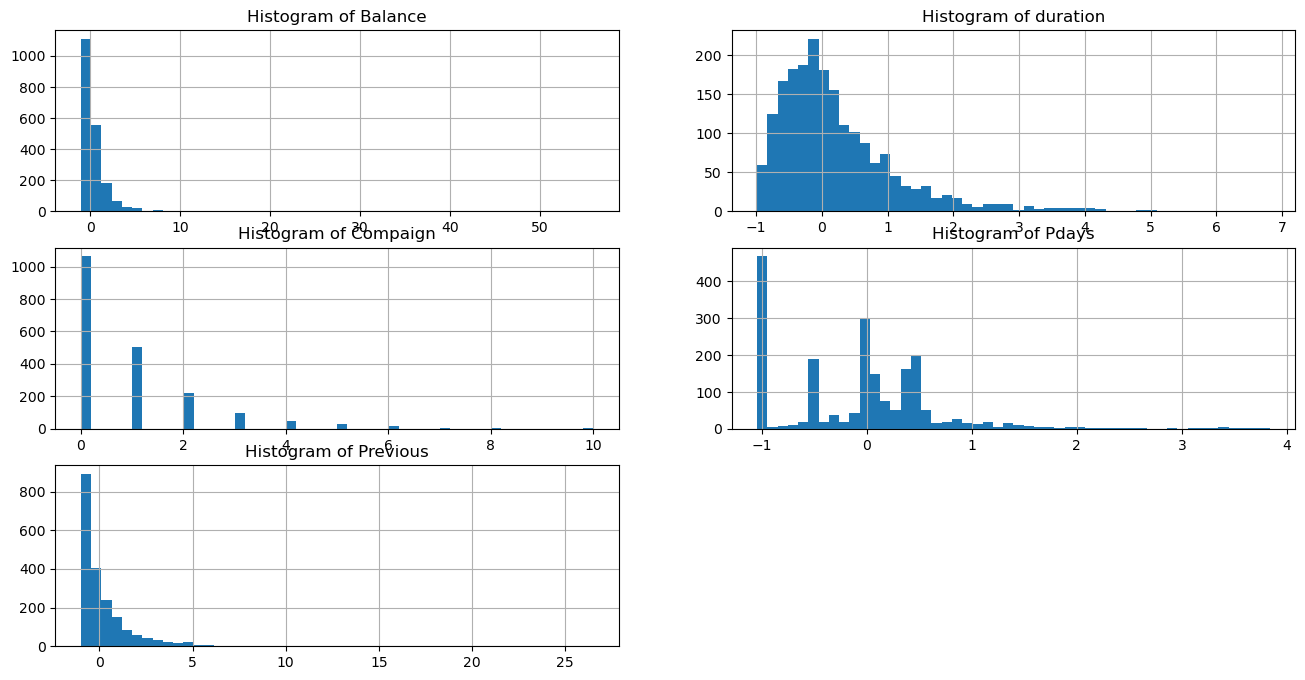

In [54]:
fig = plt.figure(figsize=(16,8))
fig.tight_layout()

ax1 = fig.add_subplot(3,2,1)
ax1.set_title("Histogram of Balance")
data_frame["balance"].hist(bins=50)

ax2 = fig.add_subplot(3,2,2)
ax2.set_title("Histogram of duration")
data_frame["duration"].hist(bins=50)

ax3 = fig.add_subplot(3,2,3)
ax3.set_title("Histogram of Compaign")
data_frame["campaign"].hist(bins=50)

ax4 = fig.add_subplot(3,2,4)
ax4.set_title("Histogram of Pdays")
data_frame["pdays"].hist(bins=50)

ax5 = fig.add_subplot(3,2,5)
ax5.set_title("Histogram of Previous")
data_frame["previous"].hist(bins=50)

From the above histograms we can see that all of them are skewed towards left. But, note that the histogram for compaign is not continous numerical feature rather it is an ordinal feature. Hence, we will not do anything further to this feature as it has already been scaled.  
Before taking care of outliers, let's find minimum value for the following features: balance, duration, pdays, and previous.

In [55]:
data_frame[["balance", "duration", "pdays", "previous"]].min()

balance    -1.060984
duration   -0.982833
pdays      -1.044223
previous   -1.000000
dtype: float64

Since the extreme values are practically possible in all columns, therefore instead of ignoring the data rows with extreme values we can transform them to diminish the negative impact of outliers to ML models. We can do that with log transformation. But, we have negative values in all the columns. To eliminate negative values we need to add a constant to the columns. I choose to shift the values to the interval [1,+∞]. 

In [56]:
# Use log transformation to decrease the impact of outliers
data_frame["balance"] = np.log(data_frame["balance"] + 2.061)
data_frame["duration"] = np.log(data_frame["duration"] + 1.983)
data_frame["pdays"] = np.log(data_frame["pdays"] + 2.045)
data_frame["previous"] = np.log(data_frame["previous"] + 2)

To see the impact of log transformation, let's plot again. 

<AxesSubplot:title={'center':'Histogram of Previous'}>

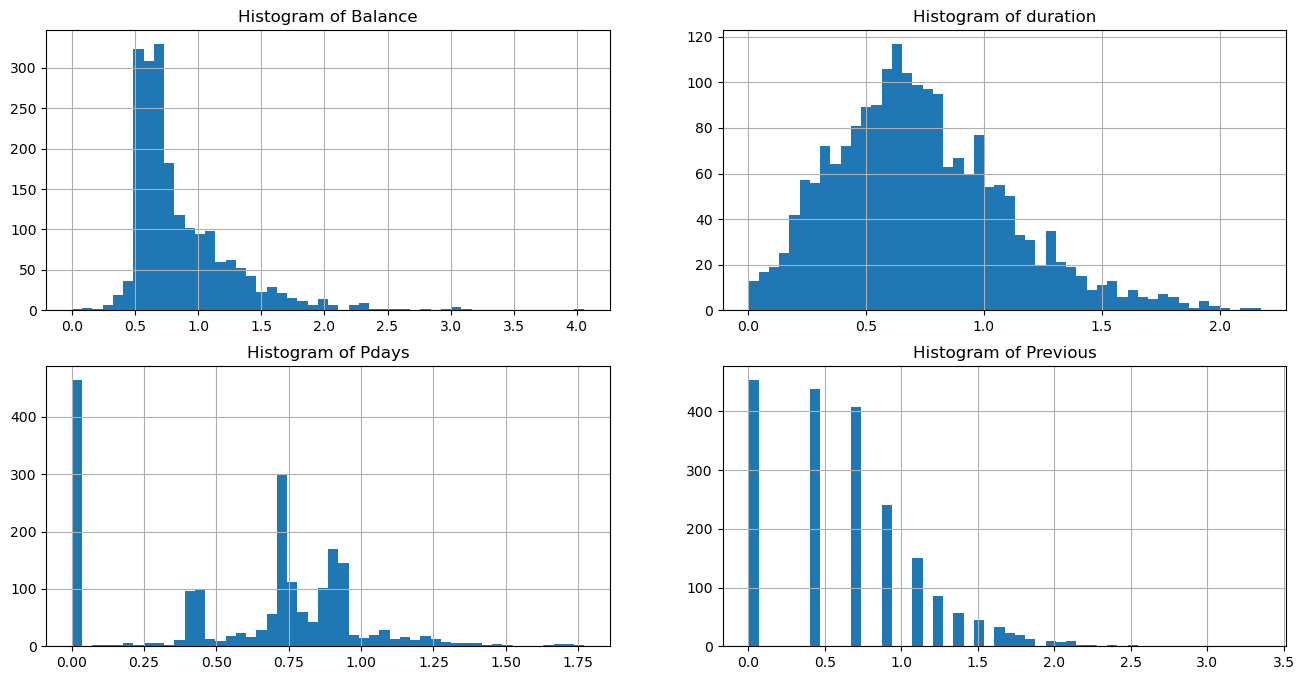

In [57]:
fig = plt.figure(figsize=(16,8))
fig.tight_layout()

ax1 = fig.add_subplot(2,2,1)
ax1.set_title("Histogram of Balance")
data_frame["balance"].hist(bins=50)

ax2 = fig.add_subplot(2,2,2)
ax2.set_title("Histogram of duration")
data_frame["duration"].hist(bins=50)

ax3 = fig.add_subplot(2,2,3)
ax3.set_title("Histogram of Pdays")
data_frame["pdays"].hist(bins=50)

ax4 = fig.add_subplot(2,2,4)
ax4.set_title("Histogram of Previous")
data_frame["previous"].hist(bins=50)

## Save DataFrame

In [58]:
# Save dataframe
data_frame.to_csv("transformed_bank_data.csv", index=False)

### Filling Missing Values
In the given data set, there are 12, 10, 104, 191, and 454 missing values in columns age, job, education, contact, and poutcome respectively. For column age, I filled in the missing values using the median of the age column. For columns job, education, and contact I think it makes sense to fill in the missing values using the most frequently occurring value in these columns, hence I used this approach to fill in the missing values in the mention columns. The column poutcome has 454 missing values which means 20% of the values are missing. Hence, I dropped this column from the data set. 
### Encoding Data
The columns job, marital, default, contact, and new_load (my new derived feature) are nominal in nature. Hence, I used one hot encoding scheme to encode these columns. The columns month and education are ordinal in nature, hence I used number encoding to encode the data in these columns. Finally, the subscribed column is the output, therefore I used number encoding [0, 1] to encode the column. 
### Scaling Data and Treating Outliers
The columns age and education don’t have many outliers, and they don’t follow perfect Gaussian distribution, hence I used MinMaxScaler to scale the data in these columns. Other columns have relatively large number of outlies, hence I used RobustScaler to scale in the data in other columns. For treating outliers I transformed some of the columns using log transformation. More information is available above. 

### Additional Feature
An additional feature was created using housing and loan columns. Both columns tells whether the person has a loan or not, therefore I created a feature called "new_loan". The values in the "new_loan" columns are filled as follows:
- In value in column housing or in column loan is equal to "yes", the new_loan will also have a value "yes".
- In both columns "housing" and "loan" have value no, the "new_loan" column will have a value "no".
Afterwards, I deleted columns housing and loan from the data set.